In [63]:
from astropy.table import Table
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [64]:
table=Table.read("norsiah_data.csv")
table

Radius,V_rot,e,w
float64,float64,float64,float64
0.643,31.74,7.3385,0.0186
0.965,44.56,7.0315,0.0202
1.287,53.48,3.5824,0.0779
1.608,57.07,2.5539,0.1533
1.93,61.31,4.1813,0.0572
2.251,64.91,1.7205,0.3378
2.573,68.47,4.191,0.0569
2.895,71.62,2.2004,0.2065
3.216,75.35,1.7779,0.3164


C:\Users\hassa\AppData\Local\Temp\ipykernel_612\1539726101.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(table['Radius'],table['V_rot'],yerr=table['e'],fmt='o', marker='o', ms=3 , mfc='black') # (x, y, yerror)


<function matplotlib.pyplot.show(close=None, block=None)>

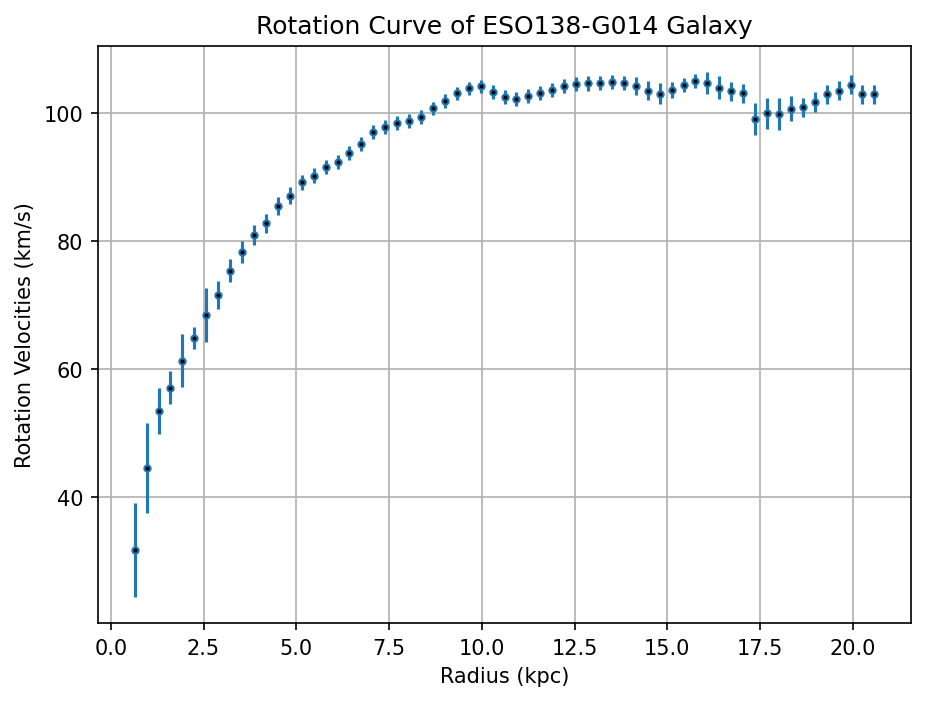

In [65]:
plt.figure(figsize=(7,5), dpi=150)
plt.errorbar(table['Radius'],table['V_rot'],yerr=table['e'],fmt='o', marker='o', ms=3 , mfc='black') # (x, y, yerror)
#plt.scatter(table['Radius'],table['V_rot'],s = 5, color = 'red') # (x, y, s=size)
plt.xlabel('Radius (kpc)')
plt.ylabel('Rotation Velocities (km/s)')
plt.title('Rotation Curve of ESO138-G014 Galaxy')
plt.grid(True)
plt.show

Non-linear fitting

In [66]:
# define data set
x_data = table['V_rot']
y_data = table['Radius']

In [ ]:
# define fitting equation
def NFW_profile(x, A, k, C):
    return A * np.exp(-k * x) + C